This project explores publicly available data from LendingClub.com and predicts whether or not the borrower paid back their loan in full.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
loans = pd.read_csv('/content/drive/MyDrive/Refactored_Py_DS_ML_Bootcamp-master/15-Decision-Trees-and-Random-Forests/loan_data.csv')

In [4]:
loans.head(4)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0


Here are what the columns represent:
 
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
 
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "home_improvement", "major_purchase", "small_business", "purpose_all_other").
 
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
 
* installment: The monthly installments owed by the borrower if the loan is funded.
 
* log.annual.inc: The natural log of the self-reported annual income of the borrower. Ex. ln(50,000)
 
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
 
* fico: The FICO credit score of the borrower.
days.with.cr.line: The number of days the borrower has had a credit line.
 
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
 
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
 
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
 
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
 
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [5]:
loans.info()
# Column purpose will be transformed into dummy variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# EDA

Text(0.5, 0, 'FICO')

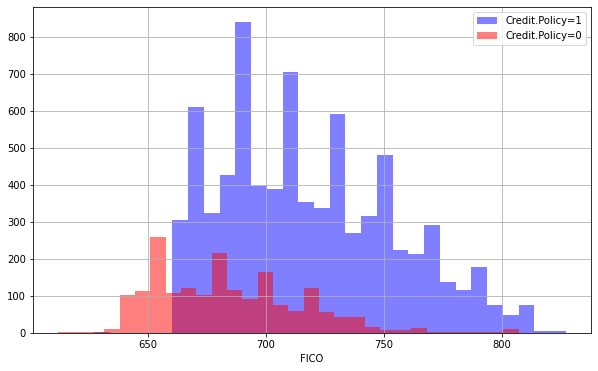

In [7]:
# Histogram of FICO scores by credit policy
 
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

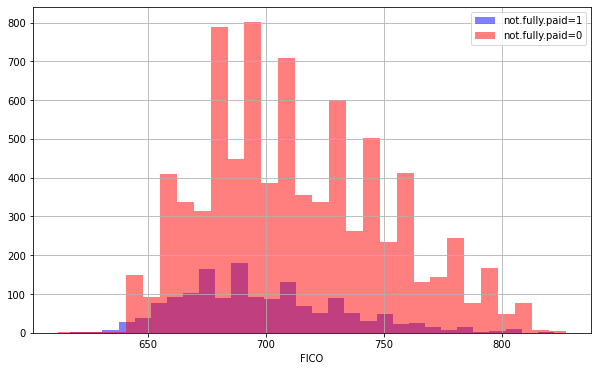

In [8]:
# Histogram of FICO scores by whether the loan was paid off or defaulted
 
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

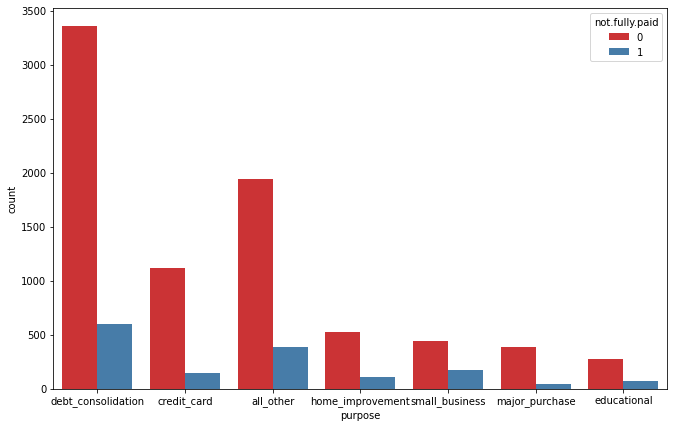

In [9]:
# Count plot of purpose of loan by whether the loan was paid off or defaulted
 
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

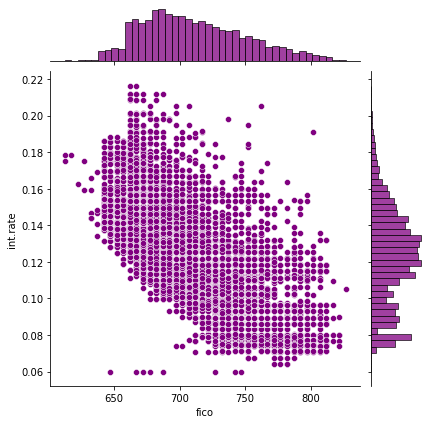

In [10]:
# Jointplot between FICO and interest rate
 
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<Figure size 792x504 with 0 Axes>

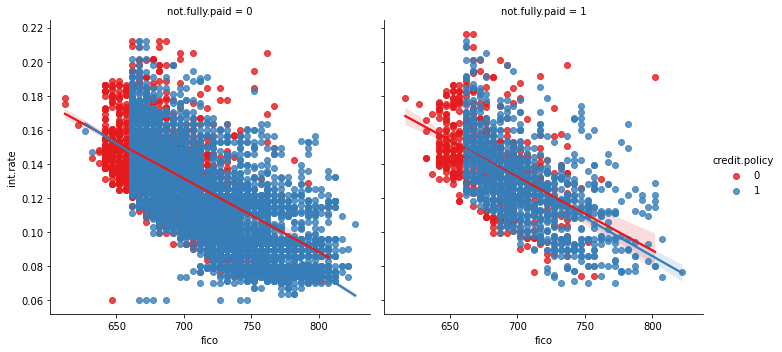

In [11]:
# Scatterplot of FICO score and interest rate colored by credit policy and divided by whether the loan defaulted or was paid off
 
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [11]:
cat_feats = ['purpose']

In [12]:
# Convert 'purpose' column into dummy variables
 
final_data = pd.get_dummies(loans,columns=cat_feats)

In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

In [14]:
final_data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [21]:
# Counts of each credit policy
final_data['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [22]:
# Counts of defaulted and paid off loans
final_data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [37]:
# Counts by loan purpose
print('Count of credit card loans:', final_data['purpose_credit_card'].value_counts()[1])
print('Count of debt consolidation loans:', final_data['purpose_debt_consolidation'].value_counts()[1])
print('Count of educational loans:', final_data['purpose_educational'].value_counts()[1])
print('Count of home improvement loans:', final_data['purpose_home_improvement'].value_counts()[1])
print('Count of major purchase loans:', final_data['purpose_major_purchase'].value_counts()[1])
print('Count of small business loans:', final_data['purpose_small_business'].value_counts()[1])
print('Count of all other loans:', final_data['purpose_all_other'].value_counts()[1])

Count of credit card loans: 1262
Count of debt consolidation loans: 3957
Count of educational loans: 343
Count of home improvement loans: 629
Count of major purchase loans: 437
Count of small business loans: 619
Count of all other loans: 2331


# EDA Deployment with Dash

In [ ]:
!pip install jupyter-dash
!pip install pyngrok

In [ ]:
import plotly.graph_objects as go

unpaid_FICO = loans[loans['not.fully.paid']==1]['fico']
paid_FICO = loans[loans['not.fully.paid']==0]['fico']

# Histogram of FICO scores by whether the loan was paid off or defaulted
fig1 = go.Figure()
fig1.add_trace(go.Histogram(x=unpaid_FICO, name="default"))
fig1.add_trace(go.Histogram(x=paid_FICO, name="paid"))
fig1.update_layout(barmode='overlay', title='Histogram of FICO scores by whether the loan was paid off or defaulted', xaxis_title='FICO') # Overlay both histograms
fig1.update_traces(opacity=0.75) # Reduce opacity to see both histograms

# Count plot of purpose of loan by whether the loan was paid off or defaulted
import plotly.express as px
fig2 = px.histogram(loans, x='purpose', color='not.fully.paid', barmode='group')
fig2.update_layout(title='Count plot of purpose of loan by whether the loan was paid off or defaulted')

# Scatter plot between FICO and interest rate
fig3 = px.scatter(loans, x='fico',y='int.rate', color='not.fully.paid')
fig3.update_layout(title='Scatter plot between FICO and interest rate')

In [41]:
# Dashboard with Dash
 
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
from pyngrok import ngrok

app = JupyterDash(__name__)
 
app.layout = html.Div([
    dcc.Graph(figure=fig1),
    dcc.Graph(figure=fig2),
    dcc.Graph(figure=fig3)
])
 
app.run_server(mode='external')

Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
! ngrok authtoken 1vXlcIP1hk2NmY9UBuuSHU5gLHX_72emhyJmaGcTmoF6TQfKk

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
public_url = ngrok.connect(addr = '8050')

In [ ]:
#ngrok url link

public_url

<NgrokTunnel: "http://5c6424b1ab51.ngrok.io" -> "http://localhost:8050">

In [ ]:
ngrok.kill()

#Modeling

 ## Train-test-split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Random Forest and Boosting

In [44]:
# Random Forest and Boosting Models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [45]:
rfc = RandomForestClassifier(n_estimators=400)

In [46]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
rfc_Predictions = rfc.predict(X_test)

In [48]:
# Adaboost Model
abc = AdaBoostClassifier().fit(X_train, y_train)
abc_Predictions = abc.predict(X_test)

In [49]:
# Gradient boosting Model
gbc = GradientBoostingClassifier().fit(X_train, y_train)
gbc_Predictions = gbc.predict(X_test)

## Logistic Regression

In [50]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [51]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
logistic_Predictions = logmodel.predict(X_test)

## Model Accuracy

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
# Classification Report for Random Forest Model
print(classification_report(y_test,rfc_Predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.69      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.77      0.51      0.48      2874
weighted avg       0.82      0.85      0.78      2874



In [55]:
# Classification Report for Adaboost Model
print(classification_report(y_test,abc_Predictions))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2431
           1       0.36      0.05      0.08       443

    accuracy                           0.84      2874
   macro avg       0.60      0.52      0.50      2874
weighted avg       0.77      0.84      0.78      2874



In [56]:
# Classification Report for Gradient Boosting Model
print(classification_report(y_test,gbc_Predictions))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.45      0.03      0.06       443

    accuracy                           0.84      2874
   macro avg       0.65      0.51      0.49      2874
weighted avg       0.79      0.84      0.78      2874



In [57]:
# Classification Report for Logistic Regression Model
print(classification_report(y_test,logistic_Predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.01      0.02       443

    accuracy                           0.85      2874
   macro avg       0.67      0.50      0.47      2874
weighted avg       0.79      0.85      0.78      2874



In [32]:
# Random forest confusion matrix

print(confusion_matrix(y_test,rfc_Predictions))

[[2427    4]
 [ 437    6]]


In [58]:
# Adaboost confusion matrix

print(confusion_matrix(y_test,abc_Predictions))

[[2393   38]
 [ 422   21]]


In [59]:
# Gradient boosting confusion matrix

print(confusion_matrix(y_test,gbc_Predictions))

[[2415   16]
 [ 430   13]]


In [60]:
# Logistic confusion matrix

print(confusion_matrix(y_test,logistic_Predictions))

[[2427    4]
 [ 439    4]]


All the models above seem to be comprable on this dataset. Adaboost did best on predicting if a borrower will default but was slightly lower on predicting if a borrower will pay off the loan entirely. 

# Save and load model for later use on new data


## Save model

In [61]:
from google.colab import drive
 
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [62]:
import joblib

In [63]:
# Save the models to Drive

joblib.dump(rfc,'/content/drive/MyDrive/Projects/Loan_Data_SupervisedClassification/rfc.joblib')
joblib.dump(abc,'/content/drive/MyDrive/Projects/Loan_Data_SupervisedClassification/abc.joblib')
joblib.dump(logmodel,'/content/drive/MyDrive/Projects/Loan_Data_SupervisedClassification/logmodel.joblib')

['/content/drive/MyDrive/Projects/Loan_Data_SupervisedClassification/logmodel.joblib']

## Load model and predict

In [64]:
from google.colab import drive
 
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [65]:
import joblib
import pandas as pd
import numpy as np

In [68]:
# Load the models
loaded_rfc = joblib.load('/content/drive/MyDrive/Projects/Loan_Data_SupervisedClassification/rfc.joblib')
loaded_abc = joblib.load('/content/drive/MyDrive/Projects/Loan_Data_SupervisedClassification/abc.joblib')
loaded_lr = joblib.load('/content/drive/MyDrive/Projects/Loan_Data_SupervisedClassification/logmodel.joblib')

In [78]:
columns = ['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business']

In [79]:
new_app = pd.DataFrame([[1, 0.073, 224, 11.01, 13.65, 797, 4400, 0, 0.3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]], columns=columns)

In [80]:
new_app

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.073,224,11.01,13.65,797,4400,0,0.3,0,0,0,0,0,0,0,1,0,0


Random Forest predicts this loan will be paid off. 

In [81]:
loaded_lr.predict(new_app)

array([0])

Adaboost model predicts this loan will be paid off. 

In [82]:
loaded_abc.predict(new_app)

array([0])

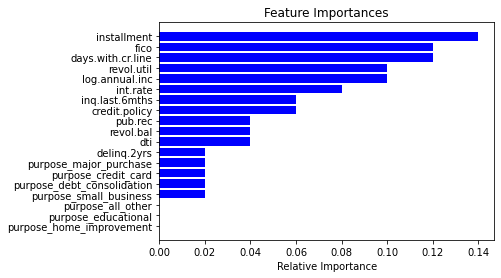

In [83]:
importances = loaded_abc.feature_importances_

indices = np.argsort(importances)

Features = new_app.columns

import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [Features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()